# context classification

- topic modeling
 - Topic modeling is a type of statistical modeling that uses unsupervised Machine Learning to identify clusters or groups of similar words within a body of text.
 -resource: https://levity.ai/blog/what-is-topic-modeling#:~:text=Topic%20modeling%20is%20a%20type,predefined%20tags%20or%20training%20data.


- sentence similarity / semantic textual similarity
  - similarity calculation: cosine similarity, mean reciprocal rank, spearman correlation, peaerson correlation
  - resource: https://huggingface.co/tasks/sentence-similarity
  - langchain: https://python.langchain.com/docs/integrations/text_embedding/sentence_transformers
  - model: https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
  - for spanish model: https://huggingface.co/hiiamsid/sentence_similarity_spanish_es

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 16.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=b1aebf4f6ba0f943ffac327ef83e473d7cf3768f95adc4f4fca697425e8932bd
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:

sentences = ["what do you like to order", "can i have tea?", "I hate coffee"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)



In [ ]:
# import sentence_transformers

embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
embeddings_3 = embeddings[2]
print(util.pytorch_cos_sim(embeddings_1, embeddings_2))
print(util.pytorch_cos_sim(embeddings_1, embeddings_3))
print(util.pytorch_cos_sim(embeddings_2, embeddings_3))

In [ ]:
from sentence_transformers import SentenceTransformer, util
sentences = ["what do you want to order", "I would like to have an espresso.", "I like sport", "I would like to have a cup tea"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)



In [ ]:
# import sentence_transformers

embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
embeddings_3 = embeddings[2]
embeddings_4 = embeddings[3]
# print(util.pytorch_cos_sim(embeddings_1, embeddings_2))
# print(util.pytorch_cos_sim(embeddings_1, embeddings_3))
print(util.pytorch_cos_sim(embeddings_2, embeddings_3))
print(util.pytorch_cos_sim(embeddings_2, embeddings_4))

### try different similarity calculation

- pre-set expected response/ dialog
- drawback: the bot will always ask question

can we use gpt for classification

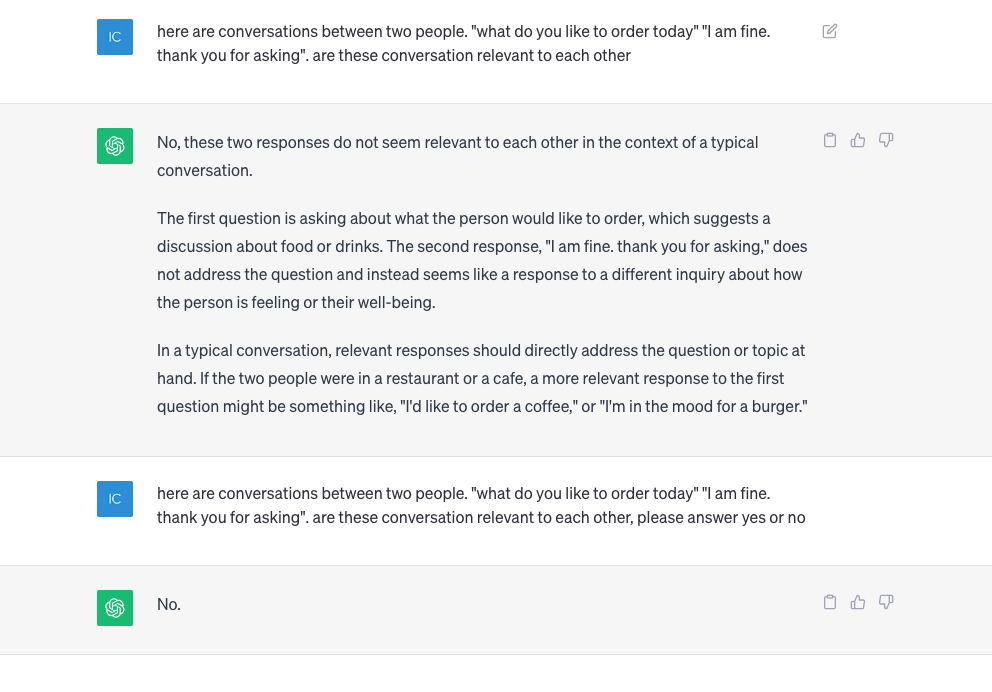

## Try with Spanish

### split the sentence and try the similarity
### try to question + answer

In [ ]:
sentences = ['¡Buenos días! Me llamo Molly. ¿Y tú?' , '¡Buenos días! Mi nombre es Molly. ¿Cómo te llamas?']

In [ ]:
model = SentenceTransformer("hiiamsid/sentence_similarity_spanish_es")
embeddings = model.encode(sentences)
print(embeddings)

In [ ]:
embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
print(util.pytorch_cos_sim(embeddings_1, embeddings_2))

In [ ]:
model = SentenceTransformer("distiluse-base-multilingual-cased-v1")

In [ ]:
embeddings = model.encode(sentences)
print(embeddings)
embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
print(util.pytorch_cos_sim(embeddings_1, embeddings_2))

## how does it performance with error in the sentence

In [ ]:
from sentence_transformers import SentenceTransformer, util
sentences = [ "I from Sn Fransscio and it is an very beautiful place", "I am from Pennsylvania"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)

In [ ]:
embeddings_1 = embeddings[0]
embeddings_2 = embeddings[1]
print(util.pytorch_cos_sim(embeddings_1, embeddings_2))
# print(util.pytorch_cos_sim(embeddings_1, embeddings_3))
# print(util.pytorch_cos_sim(embeddings_2, embeddings_3))
# print(util.pytorch_cos_sim(embeddings_2, embeddings_4))

### figure out a treshold

## Work with Vector Database

reference: https://docs.trychroma.com/api-reference

In [ ]:
!pip install -q chromadb

In [ ]:
import pandas as pd
import chromadb
from chromadb.api.types import Documents, Embeddings
from chromadb.utils import embedding_functions


In [ ]:
#data input
answer1 = 'My name Jess'
answer2 = 'I am fine. Thank you. And you? '
answer3 = 'I from Pennsylvania. '

In [ ]:
# # using hugging face
# huggingface_ef = embedding_functions.HuggingFaceEmbeddingFunction(
#     api_key="YOUR_API_KEY",
#     model_name="sentence-transformers/all-MiniLM-L6-v2"
# )

In [ ]:
# default model
## english
sentence_transformer_ef = embedding_functions.SentenceTransformerEmbeddingFunction(model_name="all-MiniLM-L6-v2")

## spanish
# sentence_transformer_ef = embedding_functions.SentenceTransformerEmbeddingFunction(model_name="distiluse-base-multilingual-cased-v1")


In [ ]:
def create_chroma_db(documents, name):
  # get the client
  chroma_client = chromadb.Client()
  ## In-memory chroma with saving/loading to disk
  # chroma_client = chromadb.PersistentClient(path="/path/to/data")
  db = chroma_client.create_collection(name=name, embedding_function=sentence_transformer_ef)
  for i,d in enumerate(documents):
    db.add(
      documents=d,
      ids=str(i)
    )
  return db

In [ ]:
db = create_chroma_db([answer1, answer2, answer2], "lang-bot")

In [ ]:
pd.DataFrame(db.peek(1))

In [ ]:
def get_relevant_passage(query, db):
  passage = db.query(query_texts=[query], n_results=1)['documents'][0][0]
  return passage

In [ ]:
# Perform embedding search
passage = get_relevant_passage("Hi, my name is Isabel", db)
passage

In [ ]:
passage = get_relevant_passage("The weather is super bad", db)
passage

In [ ]:
# can only get the document by idea
db.get(ids=['1'], include=['embeddings', 'documents', 'metadatas'])

In [ ]:
# need to get the score

# option 1 new db (https://www.datacamp.com/blog/the-top-5-vector-databases)
# use langchain